In [1]:
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


## Preliminaries

In [2]:
wheretosave='/home/ubuntu/Notebooks/pushpull_trainingdata.mat'

no_data_ex=590
no_data_validation=0
no_data_test=0

total_data_ex=590 


In [3]:
import scipy.io as sio
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
from __future__ import division

run_opts = tf.RunOptions(report_tensor_allocations_upon_oom = True)


ImportError: No module named tensorflow

In [ ]:

datapath='/home/ubuntu/Notebooks/randflicker_20191212_preconv_data.mat'



data=sio.loadmat(datapath)




input_bip1_0 = data['b1_input']
input_bip2_0 = data['b2_input']
input_bip3_0 = data['b3_input']
input_bip4_0 = data['b4_input']
input_bip5_0 = data['b5_input']
input_bip6_0 = data['b6_input']
input_bip7_0 = data['b7_input']
input_bip8_0 = data['b8_input']
input_bip9_0 = data['b9_input']
input_bip10_0 = data['b10_input']
input_bip11_0 = data['b11_input']
input_bip12_0 = data['b12_input']
input_bip13_0 = data['b13_input']
input_bip14_0 = data['b14_input']

numpix=21

data_duration=input_bip1_0.shape[1]
print(data_duration)


def rearrange_bip_input(input_bip_0, startind, endind):
    input_bip_1 = reshape(input_bip_0, [1, total_data_ex, data_duration, numpix])
    input_bip_11 = input_bip_1[:, startind:endind, :, :]
    input_bip_2 = np.swapaxes(input_bip_11, 0, 3)
    input_bip_3 = reshape(input_bip_2, [numpix, no_data_ex, data_duration])
    return input_bip_3

startind = 0
endind = no_data_ex

input_bip1_train = rearrange_bip_input(input_bip1_0, startind, endind)
input_bip2_train = rearrange_bip_input(input_bip2_0, startind, endind)
input_bip3_train = rearrange_bip_input(input_bip3_0, startind, endind)
input_bip4_train = rearrange_bip_input(input_bip4_0, startind, endind)
input_bip5_train = rearrange_bip_input(input_bip5_0, startind, endind)
input_bip6_train = rearrange_bip_input(input_bip6_0, startind, endind)
input_bip7_train = rearrange_bip_input(input_bip7_0, startind, endind)
input_bip8_train = rearrange_bip_input(input_bip8_0, startind, endind)
input_bip9_train = rearrange_bip_input(input_bip9_0, startind, endind)
input_bip10_train = rearrange_bip_input(input_bip10_0, startind, endind)
input_bip11_train = rearrange_bip_input(input_bip11_0, startind, endind)
input_bip12_train = rearrange_bip_input(input_bip12_0, startind, endind)
input_bip13_train = rearrange_bip_input(input_bip13_0, startind, endind)
input_bip14_train = rearrange_bip_input(input_bip14_0, startind, endind)



In [ ]:
print(shape(input_bip1_0))
print(input_bip1_0.dtype)


In [4]:

# SET NUMBER OF NEURONS IN EACH LAYER
no_filters=14
no_bipolars=21 
no_bipolar_types=14
no_relu=0 
no_am_types = 5
no_am1=7 
no_am2=21
no_am3=21
no_gc=8

## load and handle filters

In [7]:
filter_data=sio.loadmat('/home/ubuntu/Notebooks/dc_filterbank.mat')

bip_filters=filter_data['franke_dc_filters']

ds=2 #downsample factor
bip_filters=bip_filters[::ds, :] 

bip_filtersize=shape(bip_filters)[0]
bip_filters=np.transpose(bip_filters)
print(bip_filtersize)

bip_filters=np.reshape(bip_filters, [14, bip_filtersize, 1, 1, 1])

filter1=np.reshape(bip_filters[0, :, :, :, :], [bip_filtersize, 1, 1, 1])
filter2=np.reshape(bip_filters[1, :, :, :, :], [bip_filtersize, 1, 1, 1])
filter3=np.reshape(bip_filters[2, :, :, :, :], [bip_filtersize, 1, 1, 1])
filter4=np.reshape(bip_filters[3, :, :, :, :], [bip_filtersize, 1, 1, 1])
filter5=np.reshape(bip_filters[4, :, :, :, :], [bip_filtersize, 1, 1, 1])
filter6=np.reshape(bip_filters[5, :, :, :, :], [bip_filtersize, 1, 1, 1])
filter7=np.reshape(bip_filters[6, :, :, :, :], [bip_filtersize, 1, 1, 1])
filter8=np.reshape(bip_filters[7, :, :, :, :], [bip_filtersize, 1, 1, 1])
filter9=np.reshape(bip_filters[8, :, :, :, :], [bip_filtersize, 1, 1, 1])
filter10=np.reshape(bip_filters[9, :, :, :, :], [bip_filtersize, 1, 1, 1])
filter11=np.reshape(bip_filters[10, :, :, :, :], [bip_filtersize, 1, 1, 1])
filter12=np.reshape(bip_filters[11, :, :, :, :], [bip_filtersize, 1, 1, 1])
filter13=np.reshape(bip_filters[12, :, :, :, :], [bip_filtersize, 1, 1, 1])
filter14=np.reshape(bip_filters[13, :, :, :, :], [bip_filtersize, 1, 1, 1])


175


## Helper Functions

In [8]:
#Helper Functions


def bias_var(shape, initial_val):
    initial = tf.constant(initial_val, shape=shape)
#     initial = tf.random_uniform(shape, minval=0.5, maxval=3.5, dtype=tf.float32) #2.9
    return tf.Variable(initial)

def synapse_var(shape, initial_val):
    initial=tf.constant(initial_val, shape=shape)
#     initial = tf.random_uniform(shape, minval=0.1, maxval=0.8, dtype=tf.float32) #2.9
    return tf.Variable(initial) #initial

def ag_synapse_var(shape, true_initial_val, train_initial_val):
    initial=tf.constant(true_initial_val, shape=shape)
#     initial=tf.constant(train_initial_val, shape=shape)
#     initial = tf.random_uniform(shape, minval=0.1, maxval=0.8, dtype=tf.float32) #2.9
    return tf.Variable(initial) #initial

def pbconv2d(x, W):
    padsize=175 #200 #W.shape[0]
    paddedx=tf.pad(x, [[0, 0], [padsize, 0], [0, 0], [0, 0]], 'CONSTANT')
    outconv=tf.nn.conv2d(paddedx, W, strides=[1, 1, 1, 1], padding='SAME') #250 for movingdot and noise
    #return tf.reshape(outconv[:, np.round(padsize/2).astype(int):np.round(padsize/2).astype(int)+250, 0, 0], [-1, 250, 1, 1])
    return tf.reshape(outconv[:, np.round(padsize/2).astype(int):np.round(padsize/2).astype(int)+x_train.shape[1], 0, 0], [-1, x_train.shape[1], 1, 1])



# Trained Network

In [9]:

input_bip1_ = tf.placeholder("float32", name="input_bip1")
input_bip2_ = tf.placeholder("float32", name="input_bip2")
input_bip3_ = tf.placeholder("float32", name="input_bip3")
input_bip4_ = tf.placeholder("float32", name="input_bip4")
input_bip5_ = tf.placeholder("float32", name="input_bip5")
input_bip6_ = tf.placeholder("float32", name="input_bip6")
input_bip7_ = tf.placeholder("float32", name="input_bip7")
input_bip8_ = tf.placeholder("float32", name="input_bip8")
input_bip9_ = tf.placeholder("float32", name="input_bip9")
input_bip10_ = tf.placeholder("float32", name="input_bip10")
input_bip11_ = tf.placeholder("float32", name="input_bip11")
input_bip12_ = tf.placeholder("float32", name="input_bip12")
input_bip13_ = tf.placeholder("float32", name="input_bip13")
input_bip14_ = tf.placeholder("float32", name="input_bip14")




In [10]:
# Define Variables

b1g = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
b2g = [0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 5.5]
b3g = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.5, 0.0]
b4g = [0.0, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0]
b5g = [0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.0]
b6g = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
b7g = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
b8g = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
b9g = [0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.0, 0.0]
b10g = [0.0, 0.0, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0]
b11g = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
b12g = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
b13g = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
b14g = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

b1copyg = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
b2copyg = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
b3copyg = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
b4copyg = [0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
b5copyg = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
b6copyg = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
b7copyg = [0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
b8copyg = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
b9copyg = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
b10copyg = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
b11copyg = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
b12copyg = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
b13copyg = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
b14copyg = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

b1b = 0.0
b2b = 0.0
b3b = -29.0
b4b = 0.0
b5b = 0.0 
b6b = 0.0
b7b = 0.0
b8b = 0.0
b9b = 0.0
b10b = -0.0 
b11b = -0.0 
b12b = 0.0
b13b = 0.0
b14b = 0.0


b1a1 = 0.0
b2a1 = 0.0
b3a1 = 0.0
b4a1 = 0.5
b5a1 = 0.0
b6a1 = 0.0
b7a1 = 0.5
b8a1 = 0.0
b9a1 = 0.0
b10a1 = 0.0
b11a1 = 0.0
b12a1 = 0.0
b13a1 = 0.0
b14a1 = 0.0

b1a2 = 0.0
b2a2 = 0.0
b3a2 = 0.0
b4a2 = 0.0
b5a2 = 0.0
b6a2 = 0.0
b7a2 = 0.0
b8a2 = 0.0
b9a2 = 0.0
b10a2 = 1.7 
b11a2 = 0.0
b12a2 = 0.0
b13a2 = 0.0
b14a2 = 0.0

b1a3 = 0.0
b2a3 = 0.0
b3a3 = 0.0
b4a3 = 0.0
b5a3 = 0.0
b6a3 = 0.0
b7a3 = 0.0
b8a3 = 0.0
b9a3 = 0.0
b10a3 = 0.0 
b11a3 = 1.0 
b12a3 = 0.0
b13a3 = 0.0
b14a3 = 0.0




a1g = [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
a2g = [0.0, 0.0, 0.0, 0.0, 0.0, 100.0, 0.0, 0.0]
a3g = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.5, 1.5]

a1b3copy = 0.0
a1b4copy = 0.1
a1b5copy = 0.0
a1b6copy = 0.0
a1b7copy = 0.1
a1b8copy = 0.0
a1b9copy = 0.0



bip1_gc_initial=np.zeros([no_bipolars, no_gc])
for bip_i in [5, 6, 7, 8]:
    for gc_i in range(no_gc):
        bip1_gc_initial[bip_i, gc_i]=b1g[gc_i]
bip1_gc_initial=bip1_gc_initial.astype(float32)

bip2_gc_initial=np.zeros([no_bipolars, no_gc])
for bip_i in [5, 6, 7, 8]:
    for gc_i in range(no_gc):
        bip2_gc_initial[bip_i, gc_i]=b2g[gc_i]
bip2_gc_initial=bip2_gc_initial.astype(float32)

bip3_gc_initial=np.zeros([no_bipolars, no_gc])
for bip_i in [5, 6, 7, 8]:
    for gc_i in range(no_gc):
        bip3_gc_initial[bip_i, gc_i]=b3g[gc_i]
bip3_gc_initial=bip3_gc_initial.astype(float32)

bip4_gc_initial=np.zeros([no_bipolars, no_gc])
for bip_i in range(4, 12):
    for gc_i in range(no_gc):
        bip4_gc_initial[bip_i, gc_i]=b4g[gc_i]
bip4_gc_initial=bip4_gc_initial.astype(float32)

bip5_gc_initial=np.zeros([no_bipolars, no_gc])
for bip_i in range(4, 12):
    for gc_i in range(no_gc):
        bip5_gc_initial[bip_i, gc_i]=b5g[gc_i]
bip5_gc_initial=bip5_gc_initial.astype(float32)

bip6_gc_initial=np.zeros([no_bipolars, no_gc])
for bip_i in range(4, 12):
    for gc_i in range(no_gc):
        bip6_gc_initial[bip_i, gc_i]=b6g[gc_i]
bip6_gc_initial=bip6_gc_initial.astype(float32)

bip7_gc_initial=np.zeros([no_bipolars, no_gc])
for bip_i in range(4, 12):
    for gc_i in range(no_gc):
        bip7_gc_initial[bip_i, gc_i]=b7g[gc_i]
bip7_gc_initial=bip7_gc_initial.astype(float32)

bip8_gc_initial=np.zeros([no_bipolars, no_gc])
for bip_i in range(4, 12):
    for gc_i in range(no_gc):
        bip8_gc_initial[bip_i, gc_i]=b8g[gc_i]
bip8_gc_initial=bip8_gc_initial.astype(float32)

bip9_gc_initial=np.zeros([no_bipolars, no_gc])
for bip_i in range(4, 12):
    for gc_i in range(no_gc):
        bip9_gc_initial[bip_i, gc_i]=b9g[gc_i]
bip9_gc_initial=bip9_gc_initial.astype(float32)

bip10_gc_initial=np.zeros([no_bipolars, no_gc])
for bip_i in range(4, 12):
    for gc_i in range(no_gc):
        bip10_gc_initial[bip_i, gc_i]=b10g[gc_i]
bip10_gc_initial=bip10_gc_initial.astype(float32)

bip11_gc_initial=np.zeros([no_bipolars, no_gc])
for bip_i in range(4, 12):
    for gc_i in range(3):
        bip11_gc_initial[bip_i, gc_i]=b11g[gc_i]
bip11_gc_initial=bip11_gc_initial.astype(float32)

bip12_gc_initial=np.zeros([no_bipolars, no_gc])
for bip_i in range(4, 12):
    for gc_i in range(no_gc):
        bip12_gc_initial[bip_i, gc_i]=b12g[gc_i]
bip12_gc_initial=bip12_gc_initial.astype(float32)

bip13_gc_initial=np.zeros([no_bipolars, no_gc])
for bip_i in range(4, 12):
    for gc_i in range(no_gc):
        bip13_gc_initial[bip_i, gc_i]=b13g[gc_i]
bip13_gc_initial=bip13_gc_initial.astype(float32)

bip14_gc_initial=np.zeros([no_bipolars, no_gc])
for bip_i in range(4, 12):
    for gc_i in range(no_gc):
        bip14_gc_initial[bip_i, gc_i]=b14g[gc_i]
bip14_gc_initial=bip14_gc_initial.astype(float32)







bip1_copy_gc_initial=np.zeros([no_bipolars, no_gc])
for bip_i in range(8):
    for gc_i in range(no_gc):
        bip1_copy_gc_initial[bip_i, gc_i]=b1copyg[gc_i]
bip1_copy_gc_initial=bip1_copy_gc_initial.astype(float32)

bip2_copy_gc_initial=np.zeros([no_bipolars, no_gc])
for bip_i in range(8):
    for gc_i in range(no_gc):
        bip2_copy_gc_initial[bip_i, gc_i]=b2copyg[gc_i]
bip2_copy_gc_initial=bip2_copy_gc_initial.astype(float32)

bip3_copy_gc_initial=np.zeros([no_bipolars, no_gc])
for bip_i in range(8):
    for gc_i in range(no_gc):
        bip3_copy_gc_initial[bip_i, gc_i]=b3copyg[gc_i]
bip3_copy_gc_initial=bip3_copy_gc_initial.astype(float32)

bip4_copy_gc_initial=np.zeros([no_bipolars, no_gc])
for bip_i in range(4, 12):
    for gc_i in range(no_gc):
        bip4_copy_gc_initial[bip_i, gc_i]=b4copyg[gc_i]
bip4_copy_gc_initial=bip4_copy_gc_initial.astype(float32)

bip5_copy_gc_initial=np.zeros([no_bipolars, no_gc])
for bip_i in range(8):
    for gc_i in range(no_gc):
        bip5_copy_gc_initial[bip_i, gc_i]=b5copyg[gc_i]
bip5_copy_gc_initial=bip5_copy_gc_initial.astype(float32)

bip6_copy_gc_initial=np.zeros([no_bipolars, no_gc])
for bip_i in range(8):
    for gc_i in range(no_gc):
        bip6_copy_gc_initial[bip_i, gc_i]=b6copyg[gc_i]
bip6_copy_gc_initial=bip6_copy_gc_initial.astype(float32)

bip7_copy_gc_initial=np.zeros([no_bipolars, no_gc])
for bip_i in range(4, 12):
    for gc_i in range(no_gc):
        bip7_copy_gc_initial[bip_i, gc_i]=b7copyg[gc_i]
bip7_copy_gc_initial=bip7_copy_gc_initial.astype(float32)

bip8_copy_gc_initial=np.zeros([no_bipolars, no_gc])
for bip_i in range(8):
    for gc_i in range(no_gc):
        bip8_copy_gc_initial[bip_i, gc_i]=b8copyg[gc_i]
bip8_copy_gc_initial=bip8_copy_gc_initial.astype(float32)

bip9_copy_gc_initial=np.zeros([no_bipolars, no_gc])
for bip_i in range(8):
    for gc_i in range(no_gc):
        bip9_copy_gc_initial[bip_i, gc_i]=b9copyg[gc_i]
bip9_copy_gc_initial=bip9_copy_gc_initial.astype(float32)

bip10_copy_gc_initial=np.zeros([no_bipolars, no_gc])
for bip_i in range(8):
    for gc_i in range(no_gc):
        bip10_copy_gc_initial[bip_i, gc_i]=b10copyg[gc_i]
bip10_copy_gc_initial=bip10_copy_gc_initial.astype(float32)

bip11_copy_gc_initial=np.zeros([no_bipolars, no_gc])
for bip_i in range(8):
    for gc_i in range(3):
        bip11_gc_initial[bip_i, gc_i]=b11copyg[gc_i]
bip11_copy_gc_initial=bip11_copy_gc_initial.astype(float32)

bip12_copy_gc_initial=np.zeros([no_bipolars, no_gc])
for bip_i in range(8):
    for gc_i in range(no_gc):
        bip12_gc_initial[bip_i, gc_i]=b12copyg[gc_i]
bip12_copy_gc_initial=bip12_copy_gc_initial.astype(float32)

bip13_copy_gc_initial=np.zeros([no_bipolars, no_gc])
for bip_i in range(8):
    for gc_i in range(no_gc):
        bip13_copy_gc_initial[bip_i, gc_i]=b13copyg[gc_i]
bip13_copy_gc_initial=bip13_copy_gc_initial.astype(float32)

bip14_copy_gc_initial=np.zeros([no_bipolars, no_gc])
for bip_i in range(8):
    for gc_i in range(no_gc):
        bip14_copy_gc_initial[bip_i, gc_i]=b14copyg[gc_i]
bip14_copy_gc_initial=bip14_copy_gc_initial.astype(float32)

In [11]:
am1_b3copy_initial=np.zeros([no_am1, no_bipolars])
for am_i in range(3):
    for bip_i in range(8):
        am1_b3copy_initial[am_i, bip_i]=a1b3copy
am1_b3copy_initial=am1_b3copy_initial.astype(float32)

am1_b4copy_initial=np.zeros([no_am1, no_bipolars])
for am_i in range(1):
    for bip_i in range(4, 12):
        am1_b4copy_initial[am_i, bip_i]=a1b4copy
am1_b4copy_initial=am1_b4copy_initial.astype(float32)

am1_b5copy_initial=np.zeros([no_am1, no_bipolars])
for am_i in range(3):
    for bip_i in range(8):
        am1_b5copy_initial[am_i, bip_i]=a1b5copy
am1_b5copy_initial=am1_b5copy_initial.astype(float32)

am1_b6copy_initial=np.zeros([no_am1, no_bipolars])
for am_i in range(3):
    for bip_i in range(8):
        am1_b6copy_initial[am_i, bip_i]=a1b6copy
am1_b6copy_initial=am1_b6copy_initial.astype(float32)

am1_b7copy_initial=np.zeros([no_am1, no_bipolars])
for am_i in range(1):
    for bip_i in range(4, 12):
        am1_b7copy_initial[am_i, bip_i]=a1b7copy
am1_b7copy_initial=am1_b7copy_initial.astype(float32)

am1_b8copy_initial=np.zeros([no_am1, no_bipolars])
for am_i in range(3):
    for bip_i in range(8):
        am1_b8copy_initial[am_i, bip_i]=a1b8copy
am1_b8copy_initial=am1_b8copy_initial.astype(float32)

am1_b9copy_initial=np.zeros([no_am1, no_bipolars])
for am_i in range(3):
    for bip_i in range(8):
        am1_b9copy_initial[am_i, bip_i]=a1b9copy
am1_b9copy_initial=am1_b9copy_initial.astype(float32)


am1_gc_initial=np.zeros([no_am1, no_gc])
for am_i in range(3):
    for gc_i in range(no_gc):
        am1_gc_initial[am_i, gc_i]=a1g[gc_i]
am1_gc_initial=am1_gc_initial.astype(float32)

am1_gc_train_initial=np.zeros([no_am1, no_gc])
for am_i in range(no_am1):
    am1_gc_train_initial[am_i, 0]=0.0*np.random.uniform()
    am1_gc_train_initial[am_i, 1]=0.0*np.random.uniform()
    am1_gc_train_initial[am_i, 2]=0.0*np.random.uniform()
    am1_gc_train_initial[am_i, 3]=0.0*np.random.uniform()
    am1_gc_train_initial[am_i, 4]=0.0*np.random.uniform()
am1_gc_train_initial=am1_gc_train_initial.astype(float32)

am2_gc_initial=np.zeros([no_am2, no_gc])
for am_i in range(4, 12):
    for gc_i in range(no_gc):
        am2_gc_initial[am_i, gc_i]=a2g[gc_i]
am2_gc_initial=am2_gc_initial.astype(float32)

am2_gc_train_initial=np.zeros([no_am2, no_gc])
for am_i in range(no_am1):
    am2_gc_train_initial[am_i, 0]=0.0*np.random.uniform()
    am2_gc_train_initial[am_i, 1]=0.0*np.random.uniform()
    am2_gc_train_initial[am_i, 2]=0.0*np.random.uniform()
    am2_gc_train_initial[am_i, 3]=0.0*np.random.uniform()
    am2_gc_train_initial[am_i, 4]=0.0*np.random.uniform()
am2_gc_train_initial=am2_gc_train_initial.astype(float32)

am3_gc_initial=np.zeros([no_am3, no_gc])
for am_i in [1, 2, 3, 4, 9, 10, 11, 12]:
    for gc_i in range(no_gc):
        am3_gc_initial[am_i, gc_i]=a3g[gc_i]
am3_gc_initial=am3_gc_initial.astype(float32)

am3_gc_train_initial=np.zeros([no_am3, no_gc])
for am_i in range(no_am1):
    am3_gc_train_initial[am_i, 0]=0.0*np.random.uniform()
    am3_gc_train_initial[am_i, 1]=0.0*np.random.uniform()
    am3_gc_train_initial[am_i, 2]=0.0*np.random.uniform()
    am3_gc_train_initial[am_i, 3]=0.0*np.random.uniform()
    am3_gc_train_initial[am_i, 4]=0.0*np.random.uniform()
am3_gc_train_initial=am3_gc_train_initial.astype(float32)



bip1_am1_initial=np.zeros([no_bipolars, no_am1])
for am_i in range(1):
    for bip_i in range(8, 16):
        bip1_am1_initial[bip_i, am_i]=b1a1
bip1_am1_initial=bip1_am1_initial.astype(float32)

bip2_am1_initial=np.zeros([no_bipolars, no_am1])
for am_i in range(1):
    for bip_i in range(8, 16):
        bip2_am1_initial[bip_i, am_i]=b2a1
bip2_am1_initial=bip2_am1_initial.astype(float32)

bip3_am1_initial=np.zeros([no_bipolars, no_am1])
for am_i in range(1):
    for bip_i in range(8, 16):
        bip3_am1_initial[bip_i, am_i]=b3a1
bip3_am1_initial=bip3_am1_initial.astype(float32)

bip4_am1_initial=np.zeros([no_bipolars, no_am1])
for am_i in range(1):
    for bip_i in range(0, 4):
        bip4_am1_initial[bip_i, am_i]=b4a1
for am_i in range(1):
    for bip_i in range(12, 16):
        bip4_am1_initial[bip_i, am_i]=b4a1
        
bip4_am1_initial=bip4_am1_initial.astype(float32)

bip5_am1_initial=np.zeros([no_bipolars, no_am1])
for am_i in range(1):
    for bip_i in range(8, 16):
        bip5_am1_initial[bip_i, am_i]=b5a1
bip5_am1_initial=bip5_am1_initial.astype(float32)

bip6_am1_initial=np.zeros([no_bipolars, no_am1])
for am_i in range(1):
    for bip_i in range(8, 16):
        bip6_am1_initial[bip_i, am_i]=b6a1
bip6_am1_initial=bip6_am1_initial.astype(float32)

bip7_am1_initial=np.zeros([no_bipolars, no_am1])
for am_i in range(1):
    for bip_i in range(0, 4):
        bip7_am1_initial[bip_i, am_i]=b7a1
for am_i in range(1):
    for bip_i in range(12, 16):
        bip7_am1_initial[bip_i, am_i]=b7a1
bip7_am1_initial=bip7_am1_initial.astype(float32)

bip8_am1_initial=np.zeros([no_bipolars, no_am1])
for am_i in range(1):
    for bip_i in range(8, 16):
        bip8_am1_initial[bip_i, am_i]=b8a1
bip8_am1_initial=bip8_am1_initial.astype(float32)

bip9_am1_initial=np.zeros([no_bipolars, no_am1])
for am_i in range(1):
    for bip_i in range(8, 16):
        bip9_am1_initial[bip_i, am_i]=b9a1
bip9_am1_initial=bip9_am1_initial.astype(float32)

bip10_am1_initial=np.zeros([no_bipolars, no_am1])
for am_i in range(1):
    for bip_i in range(8, 16):
        bip10_am1_initial[bip_i, am_i]=b10a1
bip10_am1_initial=bip10_am1_initial.astype(float32)

bip11_am1_initial=np.zeros([no_bipolars, no_am1])
for am_i in range(1):
    for bip_i in range(8, 16):
        bip11_am1_initial[bip_i, am_i]=b11a1
bip11_am1_initial=bip11_am1_initial.astype(float32)

bip12_am1_initial=np.zeros([no_bipolars, no_am1])
for am_i in range(1):
    for bip_i in range(8, 16):
        bip12_am1_initial[bip_i, am_i]=b12a1
bip12_am1_initial=bip12_am1_initial.astype(float32)

bip13_am1_initial=np.zeros([no_bipolars, no_am1])
for am_i in range(1):
    for bip_i in range(8, 16):
        bip13_am1_initial[bip_i, am_i]=b13a1
bip13_am1_initial=bip13_am1_initial.astype(float32)

bip14_am1_initial=np.zeros([no_bipolars, no_am1])
for am_i in range(1):
    for bip_i in range(8, 16):
        bip14_am1_initial[bip_i, am_i]=b14a1
bip14_am1_initial=bip14_am1_initial.astype(float32)





bip1_am2_initial=np.zeros([no_bipolars, no_am2])
for am_i in range(1):
    for bip_i in range(4, 12):
        bip1_am2_initial[bip_i, am_i]=b1a2
bip1_am2_initial=bip1_am2_initial.astype(float32)

bip2_am2_initial=np.zeros([no_bipolars, no_am2])
for am_i in range(1):
    for bip_i in range(4, 12):
        bip2_am2_initial[bip_i, am_i]=b2a2
bip2_am2_initial=bip2_am2_initial.astype(float32)

bip3_am2_initial=np.zeros([no_bipolars, no_am2])
for am_i in range(1):
    for bip_i in range(4, 12):
        bip3_am2_initial[bip_i, am_i]=b3a2
bip3_am2_initial=bip3_am2_initial.astype(float32)

bip4_am2_initial=np.zeros([no_bipolars, no_am2])
for am_i in range(1):
    for bip_i in range(4, 12):
        bip4_am2_initial[bip_i, am_i]=b4a2
bip4_am2_initial=bip4_am2_initial.astype(float32)

bip5_am2_initial=np.zeros([no_bipolars, no_am2])
for am_i in range(1):
    for bip_i in range(4, 12):
        bip5_am2_initial[bip_i, am_i]=b5a2
bip5_am2_initial=bip5_am2_initial.astype(float32)

bip6_am2_initial=np.zeros([no_bipolars, no_am2])
for am_i in range(1):
    for bip_i in range(4, 12):
        bip6_am2_initial[bip_i, am_i]=b6a2
bip6_am2_initial=bip6_am2_initial.astype(float32)

bip7_am2_initial=np.zeros([no_bipolars, no_am2])
for am_i in range(1):
    for bip_i in range(4, 12):
        bip7_am2_initial[bip_i, am_i]=b7a2
bip7_am2_initial=bip7_am2_initial.astype(float32)

bip8_am2_initial=np.zeros([no_bipolars, no_am2])
for am_i in range(1):
    for bip_i in range(4, 12):
        bip8_am2_initial[bip_i, am_i]=b8a2
bip8_am2_initial=bip8_am2_initial.astype(float32)

bip9_am2_initial=np.zeros([no_bipolars, no_am2])
for am_i in range(1):
    for bip_i in range(4, 12):
        bip9_am2_initial[bip_i, am_i]=b9a2
bip9_am2_initial=bip9_am2_initial.astype(float32)

bip10_am2_initial=np.zeros([no_bipolars, no_am2])
for am_i in range(4, 12):
    bip10_am2_initial[am_i, am_i]=b10a2
bip10_am2_initial=bip10_am2_initial.astype(float32)

bip11_am2_initial=np.zeros([no_bipolars, no_am2])
for am_i in range(1):
    for bip_i in range(4, 12):
        bip11_am2_initial[bip_i, am_i]=b11a2
bip11_am2_initial=bip11_am2_initial.astype(float32)

bip12_am2_initial=np.zeros([no_bipolars, no_am2])
for am_i in range(1):
    for bip_i in range(4, 12):
        bip12_am2_initial[bip_i, am_i]=b12a2
bip12_am2_initial=bip12_am2_initial.astype(float32)

bip13_am2_initial=np.zeros([no_bipolars, no_am2])
for am_i in range(1):
    for bip_i in range(4, 12):
        bip13_am2_initial[bip_i, am_i]=b13a2
bip13_am2_initial=bip13_am2_initial.astype(float32)

bip14_am2_initial=np.zeros([no_bipolars, no_am2])
for am_i in range(1):
    for bip_i in range(4, 12):
        bip14_am2_initial[bip_i, am_i]=b14a2
bip14_am2_initial=bip14_am2_initial.astype(float32)



bip1_am3_initial=np.zeros([no_bipolars, no_am3])
for am_i in range(1):
    for bip_i in range(4, 12):
        bip1_am3_initial[bip_i, am_i]=b1a3
bip1_am3_initial=bip1_am3_initial.astype(float32)

bip2_am3_initial=np.zeros([no_bipolars, no_am3])
for am_i in range(1):
    for bip_i in range(4, 12):
        bip2_am3_initial[bip_i, am_i]=b2a3
bip2_am3_initial=bip2_am3_initial.astype(float32)

bip3_am3_initial=np.zeros([no_bipolars, no_am3])
for am_i in range(1):
    for bip_i in range(4, 12):
        bip3_am3_initial[bip_i, am_i]=b3a3
bip3_am3_initial=bip3_am3_initial.astype(float32)

bip4_am3_initial=np.zeros([no_bipolars, no_am3])
for am_i in range(1):
    for bip_i in range(4, 12):
        bip4_am3_initial[bip_i, am_i]=b4a3
bip4_am3_initial=bip4_am3_initial.astype(float32)

bip5_am3_initial=np.zeros([no_bipolars, no_am3])
for am_i in range(1):
    for bip_i in range(4, 12):
        bip5_am3_initial[bip_i, am_i]=b5a3
bip5_am3_initial=bip5_am3_initial.astype(float32)

bip6_am3_initial=np.zeros([no_bipolars, no_am3])
for am_i in range(1):
    for bip_i in range(4, 12):
        bip6_am3_initial[bip_i, am_i]=b6a3
bip6_am3_initial=bip6_am3_initial.astype(float32)

bip7_am3_initial=np.zeros([no_bipolars, no_am3])
for am_i in range(1):
    for bip_i in range(4, 12):
        bip7_am3_initial[bip_i, am_i]=b7a3
bip7_am3_initial=bip7_am3_initial.astype(float32)

bip8_am3_initial=np.zeros([no_bipolars, no_am3])
for am_i in range(1):
    for bip_i in range(4, 12):
        bip8_am3_initial[bip_i, am_i]=b8a3
bip8_am3_initial=bip8_am3_initial.astype(float32)

bip9_am3_initial=np.zeros([no_bipolars, no_am3])
for am_i in range(1):
    for bip_i in range(4, 12):
        bip9_am3_initial[bip_i, am_i]=b9a3
bip9_am3_initial=bip9_am3_initial.astype(float32)

bip10_am3_initial=np.zeros([no_bipolars, no_am3])
for am_i in range(4, 12):
    bip10_am3_initial[am_i, am_i]=b10a3
bip10_am3_initial=bip10_am3_initial.astype(float32)

bip11_am3_initial=np.zeros([no_bipolars, no_am3])
for am_i in [1, 2, 3, 4, 9, 10, 11, 12, 13, 14, 15, 16]:
#     for bip_i in range(4, 12):
    bip11_am3_initial[am_i, am_i]=b11a3
bip11_am3_initial=bip11_am3_initial.astype(float32)

bip12_am3_initial=np.zeros([no_bipolars, no_am3])
for am_i in range(1):
    for bip_i in range(4, 12):
        bip12_am3_initial[bip_i, am_i]=b12a3
bip12_am3_initial=bip12_am3_initial.astype(float32)

bip13_am3_initial=np.zeros([no_bipolars, no_am3])
for am_i in range(1):
    for bip_i in range(4, 12):
        bip13_am3_initial[bip_i, am_i]=b13a3
bip13_am3_initial=bip13_am3_initial.astype(float32)

bip14_am3_initial=np.zeros([no_bipolars, no_am3])
for am_i in range(1):
    for bip_i in range(4, 12):
        bip14_am3_initial[bip_i, am_i]=b14a3
bip14_am3_initial=bip14_am3_initial.astype(float32)





In [12]:
bip1_gc_syn=synapse_var([no_bipolars, no_gc], bip1_gc_initial)
bip2_gc_syn=synapse_var([no_bipolars, no_gc], bip2_gc_initial)
bip3_gc_syn=synapse_var([no_bipolars, no_gc], bip3_gc_initial)
bip4_gc_syn=synapse_var([no_bipolars, no_gc], bip4_gc_initial)
bip5_gc_syn=synapse_var([no_bipolars, no_gc], bip5_gc_initial)
bip6_gc_syn=synapse_var([no_bipolars, no_gc], bip6_gc_initial)
bip7_gc_syn=synapse_var([no_bipolars, no_gc], bip7_gc_initial)
bip8_gc_syn=synapse_var([no_bipolars, no_gc], bip8_gc_initial)
bip9_gc_syn=synapse_var([no_bipolars, no_gc], bip9_gc_initial)
bip10_gc_syn=synapse_var([no_bipolars, no_gc], bip10_gc_initial)
bip11_gc_syn=synapse_var([no_bipolars, no_gc], bip11_gc_initial)
bip12_gc_syn=synapse_var([no_bipolars, no_gc], bip12_gc_initial)
bip13_gc_syn=synapse_var([no_bipolars, no_gc], bip13_gc_initial)
bip14_gc_syn=synapse_var([no_bipolars, no_gc], bip14_gc_initial)

bip1_copy_gc_syn=synapse_var([no_bipolars, no_gc], bip1_copy_gc_initial)
bip2_copy_gc_syn=synapse_var([no_bipolars, no_gc], bip2_copy_gc_initial)
bip3_copy_gc_syn=synapse_var([no_bipolars, no_gc], bip3_copy_gc_initial)
bip4_copy_gc_syn=synapse_var([no_bipolars, no_gc], bip4_copy_gc_initial)
bip5_copy_gc_syn=synapse_var([no_bipolars, no_gc], bip5_copy_gc_initial)
bip6_copy_gc_syn=synapse_var([no_bipolars, no_gc], bip6_copy_gc_initial)
bip7_copy_gc_syn=synapse_var([no_bipolars, no_gc], bip7_copy_gc_initial)
bip8_copy_gc_syn=synapse_var([no_bipolars, no_gc], bip8_copy_gc_initial)
bip9_copy_gc_syn=synapse_var([no_bipolars, no_gc], bip9_copy_gc_initial)
bip10_copy_gc_syn=synapse_var([no_bipolars, no_gc], bip10_copy_gc_initial)
bip11_copy_gc_syn=synapse_var([no_bipolars, no_gc], bip11_copy_gc_initial)
bip12_copy_gc_syn=synapse_var([no_bipolars, no_gc], bip12_copy_gc_initial)
bip13_copy_gc_syn=synapse_var([no_bipolars, no_gc], bip13_copy_gc_initial)
bip14_copy_gc_syn=synapse_var([no_bipolars, no_gc], bip14_copy_gc_initial)

bip1_am1_syn = synapse_var([no_bipolars, no_am1], bip1_am1_initial)
bip2_am1_syn = synapse_var([no_bipolars, no_am1], bip2_am1_initial)
bip3_am1_syn = synapse_var([no_bipolars, no_am1], bip3_am1_initial)
bip4_am1_syn = synapse_var([no_bipolars, no_am1], bip4_am1_initial)
bip5_am1_syn = synapse_var([no_bipolars, no_am1], bip5_am1_initial)
bip6_am1_syn = synapse_var([no_bipolars, no_am1], bip6_am1_initial)
bip7_am1_syn = synapse_var([no_bipolars, no_am1], bip7_am1_initial)
bip8_am1_syn = synapse_var([no_bipolars, no_am1], bip8_am1_initial)
bip9_am1_syn = synapse_var([no_bipolars, no_am1], bip9_am1_initial)
bip10_am1_syn = synapse_var([no_bipolars, no_am1], bip10_am1_initial)
bip11_am1_syn = synapse_var([no_bipolars, no_am1], bip11_am1_initial)
bip12_am1_syn = synapse_var([no_bipolars, no_am1], bip12_am1_initial)
bip13_am1_syn = synapse_var([no_bipolars, no_am1], bip13_am1_initial)
bip14_am1_syn = synapse_var([no_bipolars, no_am1], bip14_am1_initial)

bip1_am2_syn = synapse_var([no_bipolars, no_am2], bip1_am2_initial)
bip2_am2_syn = synapse_var([no_bipolars, no_am2], bip2_am2_initial)
bip3_am2_syn = synapse_var([no_bipolars, no_am2], bip3_am2_initial)
bip4_am2_syn = synapse_var([no_bipolars, no_am2], bip4_am2_initial)
bip5_am2_syn = synapse_var([no_bipolars, no_am2], bip5_am2_initial)
bip6_am2_syn = synapse_var([no_bipolars, no_am2], bip6_am2_initial)
bip7_am2_syn = synapse_var([no_bipolars, no_am2], bip7_am2_initial)
bip8_am2_syn = synapse_var([no_bipolars, no_am2], bip8_am2_initial)
bip9_am2_syn = synapse_var([no_bipolars, no_am2], bip9_am2_initial)
bip10_am2_syn = synapse_var([no_bipolars, no_am2], bip10_am2_initial)
bip11_am2_syn = synapse_var([no_bipolars, no_am2], bip11_am2_initial)
bip12_am2_syn = synapse_var([no_bipolars, no_am2], bip12_am2_initial)
bip13_am2_syn = synapse_var([no_bipolars, no_am2], bip13_am2_initial)
bip14_am2_syn = synapse_var([no_bipolars, no_am2], bip14_am2_initial)

bip1_am3_syn = synapse_var([no_bipolars, no_am3], bip1_am3_initial)
bip2_am3_syn = synapse_var([no_bipolars, no_am3], bip2_am3_initial)
bip3_am3_syn = synapse_var([no_bipolars, no_am3], bip3_am3_initial)
bip4_am3_syn = synapse_var([no_bipolars, no_am3], bip4_am3_initial)
bip5_am3_syn = synapse_var([no_bipolars, no_am3], bip5_am3_initial)
bip6_am3_syn = synapse_var([no_bipolars, no_am3], bip6_am3_initial)
bip7_am3_syn = synapse_var([no_bipolars, no_am3], bip7_am3_initial)
bip8_am3_syn = synapse_var([no_bipolars, no_am3], bip8_am3_initial)
bip9_am3_syn = synapse_var([no_bipolars, no_am3], bip9_am3_initial)
bip10_am3_syn = synapse_var([no_bipolars, no_am3], bip10_am3_initial)
bip11_am3_syn = synapse_var([no_bipolars, no_am3], bip11_am3_initial)
bip12_am3_syn = synapse_var([no_bipolars, no_am3], bip12_am3_initial)
bip13_am3_syn = synapse_var([no_bipolars, no_am3], bip13_am3_initial)
bip14_am3_syn = synapse_var([no_bipolars, no_am3], bip14_am3_initial)


am1_gc_syn = ag_synapse_var([no_am1, no_gc], am1_gc_initial, am1_gc_train_initial)
am2_gc_syn = ag_synapse_var([no_am2, no_gc], am2_gc_initial, am2_gc_train_initial)
am3_gc_syn = ag_synapse_var([no_am3, no_gc], am3_gc_initial, am3_gc_train_initial)

am1_b3copy_syn = synapse_var([no_am1, no_bipolars], am1_b3copy_initial)
am1_b4copy_syn = synapse_var([no_am1, no_bipolars], am1_b4copy_initial)
am1_b5copy_syn = synapse_var([no_am1, no_bipolars], am1_b5copy_initial)
am1_b6copy_syn = synapse_var([no_am1, no_bipolars], am1_b6copy_initial)
am1_b7copy_syn = synapse_var([no_am1, no_bipolars], am1_b7copy_initial)
am1_b8copy_syn = synapse_var([no_am1, no_bipolars], am1_b8copy_initial)
am1_b9copy_syn = synapse_var([no_am1, no_bipolars], am1_b9copy_initial)

b1_bias_initial=b1b*np.ones([no_bipolars, 1])
b1_bias_initial=b1_bias_initial.astype(float32)

b2_bias_initial=b2b*np.ones([no_bipolars, 1])
b2_bias_initial=b2_bias_initial.astype(float32)

b3_bias_initial=b3b*np.ones([no_bipolars, 1])
b3_bias_initial=b3_bias_initial.astype(float32)

b4_bias_initial=b4b*np.ones([no_bipolars, 1])
b4_bias_initial=b4_bias_initial.astype(float32)

b5_bias_initial=b5b*np.ones([no_bipolars, 1])
b5_bias_initial=b5_bias_initial.astype(float32)

b6_bias_initial=b6b*np.ones([no_bipolars, 1])
b6_bias_initial=b6_bias_initial.astype(float32)

b7_bias_initial=b7b*np.ones([no_bipolars, 1])
b7_bias_initial=b7_bias_initial.astype(float32)

b8_bias_initial=b8b*np.ones([no_bipolars, 1])
b8_bias_initial=b8_bias_initial.astype(float32)

b9_bias_initial=b9b*np.ones([no_bipolars, 1])
b9_bias_initial=b9_bias_initial.astype(float32)

b10_bias_initial=b10b*np.ones([no_bipolars, 1])
b10_bias_initial=b10_bias_initial.astype(float32)

b11_bias_initial=b11b*np.ones([no_bipolars, 1])
b11_bias_initial=b11_bias_initial.astype(float32)

b12_bias_initial=b12b*np.ones([no_bipolars, 1])
b12_bias_initial=b12_bias_initial.astype(float32)

b13_bias_initial=b13b*np.ones([no_bipolars, 1])
b13_bias_initial=b13_bias_initial.astype(float32)

b14_bias_initial=b14b*np.ones([no_bipolars, 1])
b14_bias_initial=b14_bias_initial.astype(float32)


b1_bias=bias_var([no_bipolars, 1], b1_bias_initial)
b2_bias=bias_var([no_bipolars, 1], b2_bias_initial)
b3_bias=bias_var([no_bipolars, 1], b3_bias_initial)
b4_bias=bias_var([no_bipolars, 1], b4_bias_initial)
b5_bias=bias_var([no_bipolars, 1], b5_bias_initial)
b6_bias=bias_var([no_bipolars, 1], b6_bias_initial)
b7_bias=bias_var([no_bipolars, 1], b7_bias_initial)
b8_bias=bias_var([no_bipolars, 1], b8_bias_initial)
b9_bias=bias_var([no_bipolars, 1], b9_bias_initial)
b10_bias=bias_var([no_bipolars, 1], b10_bias_initial)
b11_bias=bias_var([no_bipolars, 1], b11_bias_initial)
b12_bias=bias_var([no_bipolars, 1], b12_bias_initial)
b13_bias=bias_var([no_bipolars, 1], b13_bias_initial)
b14_bias=bias_var([no_bipolars, 1], b14_bias_initial)


am1_bias=-0.0*np.ones([no_am1, 1])
am1_bias=am1_bias.astype(float32)
am2_bias=-1.0*np.ones([no_am2, 1])
am2_bias=am2_bias.astype(float32)
am3_bias=-1.0*np.ones([no_am3, 1])
am3_bias=am3_bias.astype(float32)

gc_bias = np.array([[-0.5], [-0.5], [-0.5], [-0.5], [-0.5], [-1.7], [-1.7], [0.0]])
gc_bias=gc_bias.astype(float32)

In [13]:
dur=data_duration
batchsize=32
no_bip=no_bipolars

#genx_ = tf.placeholder("float", shape=[x_train.shape[0], x_train.shape[1], x_train.shape[2]], name="input_generation")
batchsize_ = tf.placeholder("int32", name="batch_size")




@tf.function
def biplayer(b_input, b_bias, bip_gc_syn, no_bip, no_gc, batchsize, dur):
    b_bias_expand=tf.broadcast_to(tf.reshape(b_bias, [no_bipolars, 1, 1]), [no_bipolars, batchsize_, dur], name="bro1")
    b_bias_add=tf.add(b_input, b_bias_expand)
    b_relu=tf.nn.relu(b_bias_add)
    bip_layer_expand=tf.broadcast_to(tf.reshape(b_relu, [no_bip, batchsize_, 1, dur]), [no_bip, batchsize_, no_gc, dur], name="bro2")
    bg_syn_expand=tf.broadcast_to(tf.reshape(tf.abs(bip_gc_syn), [no_bip, 1, no_gc, 1]), [no_bip, batchsize_, no_gc, dur], name="bro3")
    bg_mult=tf.math.multiply(bip_layer_expand, bg_syn_expand)
    bg_sum=tf.reduce_sum(bg_mult, 0)
    return b_relu, bg_sum

@tf.function
def linear_biplayer(b_input, b_bias, bip_gc_syn, no_bip, no_gc, batchsize, dur):
    b_bias_expand=tf.broadcast_to(tf.reshape(b_bias, [no_bipolars, 1, 1]), [no_bipolars, batchsize_, dur], name="bro1")
    b_bias_add=tf.add(b_input, b_bias_expand)
    b_relu=b_bias_add
    bip_layer_expand=tf.broadcast_to(tf.reshape(b_relu, [no_bip, batchsize_, 1, dur]), [no_bip, batchsize_, no_gc, dur], name="bro2")
    bg_syn_expand=tf.broadcast_to(tf.reshape(tf.abs(bip_gc_syn), [no_bip, 1, no_gc, 1]), [no_bip, batchsize_, no_gc, dur], name="bro3")
    bg_mult=tf.math.multiply(bip_layer_expand, bg_syn_expand)
    bg_sum=tf.reduce_sum(bg_mult, 0)
    return b_relu, bg_sum






b1_relu, b1g_sum = linear_biplayer(input_bip1_, b1_bias, bip1_gc_syn, no_bip, no_gc, batchsize_, dur)
b2_relu, b2g_sum = biplayer(input_bip2_, b2_bias, bip2_gc_syn, no_bip, no_gc, batchsize_, dur)
b3_relu, b3g_sum = biplayer(input_bip3_, b3_bias, bip3_gc_syn, no_bip, no_gc, batchsize_, dur)
b4_relu, b4g_sum = biplayer(input_bip4_, b4_bias, bip4_gc_syn, no_bip, no_gc, batchsize_, dur)
b5_relu, b5g_sum = biplayer(input_bip5_, b5_bias, bip5_gc_syn, no_bip, no_gc, batchsize_, dur)
b6_relu, b6g_sum = biplayer(input_bip6_, b6_bias, bip6_gc_syn, no_bip, no_gc, batchsize_, dur)
b7_relu, b7g_sum = biplayer(input_bip7_, b7_bias, bip7_gc_syn, no_bip, no_gc, batchsize_, dur)
b8_relu, b8g_sum = biplayer(input_bip8_, b8_bias, bip8_gc_syn, no_bip, no_gc, batchsize_, dur)
b9_relu, b9g_sum = biplayer(input_bip9_, b9_bias, bip9_gc_syn, no_bip, no_gc, batchsize_, dur)
b10_relu, b10g_sum = biplayer(input_bip10_, b10_bias, bip10_gc_syn, no_bip, no_gc, batchsize_, dur)
b11_relu, b11g_sum = biplayer(input_bip11_, b11_bias, bip11_gc_syn, no_bip, no_gc, batchsize_, dur)
b12_relu, b12g_sum = biplayer(input_bip12_, b12_bias, bip12_gc_syn, no_bip, no_gc, batchsize_, dur)
b13_relu, b13g_sum = biplayer(input_bip13_, b13_bias, bip13_gc_syn, no_bip, no_gc, batchsize_, dur)
b14_relu, b14g_sum = biplayer(input_bip14_, b14_bias, bip14_gc_syn, no_bip, no_gc, batchsize_, dur)


@tf.function
def bip_to_am_input(b_relu, bip_am_syn, no_bip, no_am, batchsize, dur):
    bip_layer_am_expand=tf.broadcast_to(tf.reshape(b_relu, [no_bip, batchsize, 1, dur]), [no_bip, batchsize, no_am, dur], name="bro10")
    ba_syn_expand = tf.broadcast_to(tf.reshape(tf.abs(bip_am_syn), [no_bip, 1, no_am, 1]), [no_bip, batchsize, no_am, dur], name="bro11")
    ba_mult = tf.math.multiply(bip_layer_am_expand, ba_syn_expand)
    ba_sum = tf.reduce_sum(ba_mult, 0)
    return ba_sum

b4a1_sum = bip_to_am_input(b4_relu, bip4_am1_syn, no_bip, no_am1, batchsize_, dur)
b7a1_sum = bip_to_am_input(b7_relu, bip7_am1_syn, no_bip, no_am1, batchsize_, dur)

b10a2_sum = bip_to_am_input(b10_relu, bip10_am2_syn, no_bip, no_am2, batchsize_, dur)
b11a3_sum = bip_to_am_input(b11_relu, bip11_am3_syn, no_bip, no_am3, batchsize_, dur)



am1_activation = tf.add_n([b4a1_sum, b7a1_sum])
am2_activation = tf.add_n([b10a2_sum])
am3_activation = tf.add_n([b11a3_sum])

am1_bias_expand = tf.broadcast_to(am1_bias, [batchsize_, no_am1, dur], name="bro20")
am2_bias_expand = tf.broadcast_to(am2_bias, [batchsize_, no_am2, dur], name="bro21")
am3_bias_expand = tf.broadcast_to(am3_bias, [batchsize_, no_am3, dur], name="bro21")

am1_bias_add = tf.add(am1_activation, am1_bias_expand)
am2_bias_add = tf.add(am2_activation, am2_bias_expand)
am3_bias_add = tf.add(am3_activation, am3_bias_expand)

am1_output = tf.nn.relu(am1_bias_add)
am2_output = tf.nn.relu(am2_bias_add)
am3_output = tf.nn.relu(am3_bias_add)

am1_reshape = tf.reshape(am1_output, [batchsize_, no_am1, 1, dur])
am1_expand=tf.broadcast_to(am1_reshape, [batchsize_, no_am1, no_gc, dur], name="bro22")
am1g_syn_expand=tf.broadcast_to(tf.reshape(tf.abs(am1_gc_syn), [1, no_am1, no_gc, 1]), [batchsize_, no_am1, no_gc, dur], name="bro23")
am1g_mult=tf.math.multiply(am1_expand, am1g_syn_expand)
am1g_sum=tf.reduce_sum(am1g_mult, 1)

am2_reshape = tf.reshape(am2_output, [batchsize_, no_am2, 1, dur])
am2_expand=tf.broadcast_to(am2_reshape, [batchsize_, no_am2, no_gc, dur], name="bro24")
am2g_syn_expand=tf.broadcast_to(tf.reshape(tf.abs(am2_gc_syn), [1, no_am2, no_gc, 1]), [batchsize_, no_am2, no_gc, dur], name="bro25")
am2g_mult=tf.math.multiply(am2_expand, am2g_syn_expand)
am2g_sum=tf.reduce_sum(am2g_mult, 1)

am3_reshape = tf.reshape(am3_output, [batchsize_, no_am3, 1, dur])
am3_expand=tf.broadcast_to(am3_reshape, [batchsize_, no_am3, no_gc, dur], name="bro24")
am3g_syn_expand=tf.broadcast_to(tf.reshape(tf.abs(am3_gc_syn), [1, no_am3, no_gc, 1]), [batchsize_, no_am3, no_gc, dur], name="bro25")
am3g_mult=tf.math.multiply(am3_expand, am3g_syn_expand)
am3g_sum=tf.reduce_sum(am3g_mult, 1)


am1_bcopy_expand=tf.broadcast_to(am1_reshape, [batchsize_, no_am1, no_bip, dur], name="bro26")





@tf.function
def biplayer_copy_input(b_input,am_bcopy_expand, am_bcopy_syn, b_bias, bip_copy_gc_syn, no_bip, no_am, no_gc, batchsize, dur):
    ambcopy_syn_expand=tf.broadcast_to(tf.reshape(tf.abs(am_bcopy_syn), [1, no_am, no_bip, 1]), [batchsize, no_am, no_bip, dur], name="bro33")
    ambcopy_mult=tf.math.multiply(am_bcopy_expand, ambcopy_syn_expand)
    ambcopy_sum1=tf.squeeze(tf.reduce_sum(ambcopy_mult, 1))
    ambcopy_sum=tf.transpose(ambcopy_sum1, [1, 0, 2])
    
    b_bias_expand=tf.broadcast_to(tf.reshape(b_bias, [no_bipolars, 1, 1]), [no_bipolars, batchsize, dur], name="bro1")
    b_bias_add=tf.add_n([b_input,-1.0*ambcopy_sum, b_bias_expand])
    b_relu=tf.nn.relu(b_bias_add)
    bip_layer_expand=tf.broadcast_to(tf.reshape(b_relu, [no_bip, batchsize_, 1, dur]), [no_bip, batchsize, no_gc, dur], name="bro2")
    bg_syn_expand=tf.broadcast_to(tf.reshape(tf.abs(bip_copy_gc_syn), [no_bip, 1, no_gc, 1]), [no_bip, batchsize, no_gc, dur], name="bro3")
    bg_mult=tf.math.multiply(bip_layer_expand, bg_syn_expand)
    bg_sum=tf.reduce_sum(bg_mult, 0)
    return bg_sum

b3copyg_sum = biplayer_copy_input(input_bip3_,am1_bcopy_expand, am1_b3copy_syn, b3_bias, bip3_copy_gc_syn, no_bip, no_am1, no_gc, batchsize_, dur)
b4copyg_sum = biplayer_copy_input(input_bip4_,am1_bcopy_expand, am1_b4copy_syn, b4_bias, bip4_copy_gc_syn, no_bip, no_am1, no_gc, batchsize_, dur)
b5copyg_sum = biplayer_copy_input(input_bip5_,am1_bcopy_expand, am1_b5copy_syn, b5_bias, bip5_copy_gc_syn, no_bip, no_am1, no_gc, batchsize_, dur)
b6copyg_sum = biplayer_copy_input(input_bip6_,am1_bcopy_expand, am1_b6copy_syn, b6_bias, bip6_copy_gc_syn, no_bip, no_am1, no_gc, batchsize_, dur)
b7copyg_sum = biplayer_copy_input(input_bip7_,am1_bcopy_expand, am1_b7copy_syn, b7_bias, bip7_copy_gc_syn, no_bip, no_am1, no_gc, batchsize_, dur)
b8copyg_sum = biplayer_copy_input(input_bip8_,am1_bcopy_expand, am1_b8copy_syn, b8_bias, bip8_copy_gc_syn, no_bip, no_am1, no_gc, batchsize_, dur)
b9copyg_sum = biplayer_copy_input(input_bip9_,am1_bcopy_expand, am1_b9copy_syn, b9_bias, bip9_copy_gc_syn, no_bip, no_am1, no_gc, batchsize_, dur)




gc_activation=tf.add_n([b3copyg_sum, b4copyg_sum, b5copyg_sum, b6copyg_sum,  b7copyg_sum, b8copyg_sum, b9copyg_sum, b1g_sum, b2g_sum, b3g_sum, b4g_sum, b5g_sum, b6g_sum,  b7g_sum, b8g_sum, b9g_sum, b10g_sum, b11g_sum, b12g_sum, b13g_sum, b14g_sum, -1.0*am1g_sum, -1.0*am2g_sum, -1.0*am3g_sum])

gc_bias_expand=tf.broadcast_to(gc_bias, [batchsize_, no_gc, dur])
gc_bias_add=tf.add(gc_activation, gc_bias_expand)
output1=tf.nn.relu(gc_bias_add)



In [14]:
outputfeedback1=tf.zeros([batchsize_, no_gc-1, dur])


feedbackx = np.linspace(0.0, 100.0, 500)
feedbackb=3.0
feedbacky=np.exp(-1.0*(feedbackx-feedbackx[200])/feedbackb)
feedbacky[0:200]=0.0
feedbacky=(np.reshape(feedbacky, [500, 1]))
feedbackfilt=np.reshape(feedbacky, [500, 1, 1, 1])


outforconv=tf.reshape(tf.slice(output1, [0, 5, 0], [batchsize_, 1, dur]), [batchsize_, dur, 1, 1])

padsize=250 
paddedx=tf.pad(outforconv, [[0, 0], [padsize, 0], [0, 0], [0, 0]], 'CONSTANT')
outconv=tf.nn.conv2d(paddedx, feedbackfilt, strides=[1, 1, 1, 1], padding='SAME') #250 for movingdot and noise
outconv1=tf.reshape(outconv[:, np.round(padsize/2).astype(int):np.round(padsize/2).astype(int)+dur, 0, 0], [batchsize_, 1, dur])


outputfeedback=tf.nn.relu(tf.concat([outputfeedback1, outconv1], 1))

output=tf.nn.relu(tf.add(output1, -0.0*outputfeedback))
                      
                      
                      


In [16]:
sess=tf.Session()
sess.run(tf.global_variables_initializer())


In [18]:
oo_output=np.zeros([576,8, 5000])

for bbatch in range(36):
    startind=(bbatch)*16
    endind=(bbatch+1)*16
    fd={batchsize_: 16, input_bip1_: input_bip1_train[:, startind:endind, :], input_bip2_: input_bip2_train[:, startind:endind, :], input_bip3_: input_bip3_train[:, startind:endind, :], input_bip4_: input_bip4_train[:, startind:endind, :], input_bip5_: input_bip5_train[:, startind:endind, :], input_bip6_: input_bip6_train[:, startind:endind, :], input_bip7_: input_bip7_train[:, startind:endind, :], input_bip8_: input_bip8_train[:, startind:endind, :], input_bip9_: input_bip9_train[:, startind:endind, :], input_bip10_: input_bip10_train[:, startind:endind, :], input_bip11_: input_bip11_train[:, startind:endind, :], input_bip12_: input_bip12_train[:, startind:endind, :], input_bip13_: input_bip13_train[:, startind:endind, :], input_bip14_: input_bip14_train[:, startind:endind, :]}


    [o_output, o_output1, o_b1_relu, o_b3_relu, o_b4_relu, o_b5_relu, o_b7_relu,  o_b10_relu, o_b11_relu, o_am1_output, o_am2_output, o_am3_output, o_b1g_sum, o_b3g_sum, o_b4g_sum, o_b5g_sum, o_b7g_sum, o_b10a2_sum, o_b4copyg_sum, o_b7copyg_sum, o_am1g_sum, o_am1_reshape, o_am1_expand, o_am1g_mult, o_am2g_sum, o_am3g_sum,  o_gc_activation]  = sess.run([output, output1, b1_relu, b3_relu, b4_relu, b5_relu, b7_relu, b10_relu, b11_relu, am1_output, am2_output, am3_output, b1g_sum, b3g_sum, b4g_sum, b5g_sum, b7g_sum, b10a2_sum, b4copyg_sum, b7copyg_sum, am1g_sum, am1_reshape, am1_expand, am1g_mult, am2g_sum, am3g_sum,  gc_activation], feed_dict=fd, options = run_opts)
    oo_output[startind:endind,:, :]=o_output



(10, 8, 5000)

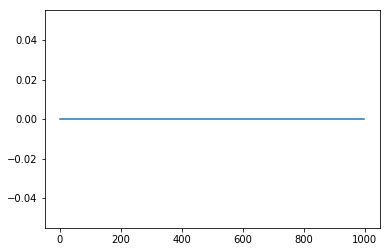

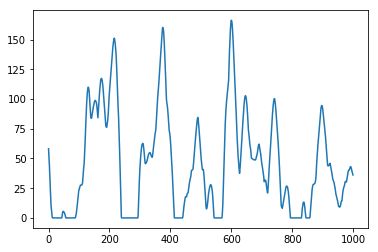

In [19]:
startind=0
endind=10

fd={batchsize_: 10, input_bip1_: input_bip1_train[:, startind:endind, :], input_bip2_: input_bip2_train[:, startind:endind, :], input_bip3_: input_bip3_train[:, startind:endind, :], input_bip4_: input_bip4_train[:, startind:endind, :], input_bip5_: input_bip5_train[:, startind:endind, :], input_bip6_: input_bip6_train[:, startind:endind, :], input_bip7_: input_bip7_train[:, startind:endind, :], input_bip8_: input_bip8_train[:, startind:endind, :], input_bip9_: input_bip9_train[:, startind:endind, :], input_bip10_: input_bip10_train[:, startind:endind, :], input_bip11_: input_bip11_train[:, startind:endind, :], input_bip12_: input_bip12_train[:, startind:endind, :], input_bip13_: input_bip13_train[:, startind:endind, :], input_bip14_: input_bip14_train[:, startind:endind, :]}

[o_output, o_output1, o_b1_relu, o_b3_relu, o_b4_relu, o_b5_relu, o_b7_relu,  o_b10_relu, o_b11_relu, o_am1_output, o_am2_output, o_am3_output, o_b1g_sum, o_b3g_sum, o_b4g_sum, o_b5g_sum, o_b7g_sum, o_b10a2_sum, o_b4copyg_sum, o_b7copyg_sum, o_am1g_sum, o_am1_reshape, o_am1_expand, o_am1g_mult, o_am2g_sum, o_am3g_sum,  o_gc_activation]  = sess.run([output, output1, b1_relu, b3_relu, b4_relu, b5_relu, b7_relu, b10_relu, b11_relu, am1_output, am2_output, am3_output, b1g_sum, b3g_sum, b4g_sum, b5g_sum, b7g_sum, b10a2_sum, b4copyg_sum, b7copyg_sum, am1g_sum, am1_reshape, am1_expand, am1g_mult, am2g_sum, am3g_sum,  gc_activation], feed_dict=fd)

plt.figure()
plt.plot(o_b1g_sum[0, 7, 1000:2000])

plt.figure()
plt.plot(o_output[0, 7, 1000:2000])

shape(o_b1g_sum)

In [29]:
db={}

db['y_train']=oo_output
db['b1_relu']=o_b1_relu
db['b4_relu']=o_b4_relu
db['b5_relu']=o_b5_relu
db['b7_relu']=o_b7_relu
db['b10_relu']=o_b10_relu
db['b11_relu']=o_b11_relu
db['b1g_sum']=o_b1g_sum
db['b4g_sum']=o_b4g_sum
db['b5g_sum']=o_b5g_sum
db['b7g_sum']=o_b7g_sum
db['b10a2_sum']=o_b10a2_sum
db['b4copyg_sum']=o_b4copyg_sum
db['b7copyg_sum']=o_b7copyg_sum
db['am1g_sum']=o_am1g_sum
db['am1_expand']=o_am1_expand
db['am1_reshape']=o_am1_reshape
db['am1g_mult']=o_am1g_mult
db['am2g_sum']=o_am2g_sum
db['am1_output']=o_am1_output
db['am2_output']=o_am2_output
db['gc_activation']=o_gc_activation

db['bip1_gc_syn']=bip1_gc_initial
db['bip2_gc_syn']=bip2_gc_initial
db['bip3_gc_syn']=bip3_gc_initial
db['bip4_gc_syn']=bip4_gc_initial
db['bip5_gc_syn']=bip5_gc_initial
db['bip6_gc_syn']=bip6_gc_initial
db['bip7_gc_syn']=bip7_gc_initial
db['bip8_gc_syn']=bip8_gc_initial
db['bip9_gc_syn']=bip9_gc_initial
db['bip10_gc_syn']=bip10_gc_initial
db['bip11_gc_syn']=bip11_gc_initial
db['bip12_gc_syn']=bip12_gc_initial
db['bip13_gc_syn']=bip13_gc_initial
db['bip14_gc_syn']=bip14_gc_initial


db['bip1_am1_syn']=bip1_am1_initial
db['bip2_am1_syn']=bip2_am1_initial
db['bip3_am1_syn']=bip3_am1_initial
db['bip4_am1_syn']=bip4_am1_initial
db['bip5_am1_syn']=bip5_am1_initial
db['bip6_am1_syn']=bip6_am1_initial
db['bip7_am1_syn']=bip7_am1_initial
db['bip8_am1_syn']=bip8_am1_initial
db['bip9_am1_syn']=bip9_am1_initial
db['bip10_am1_syn']=bip10_am1_initial
db['bip11_am1_syn']=bip11_am1_initial
db['bip12_am1_syn']=bip12_am1_initial
db['bip13_am1_syn']=bip13_am1_initial
db['bip14_am1_syn']=bip14_am1_initial



db['bip1_am2_syn']=bip1_am2_initial
db['bip2_am2_syn']=bip2_am2_initial
db['bip3_am2_syn']=bip3_am2_initial
db['bip4_am2_syn']=bip4_am2_initial
db['bip5_am2_syn']=bip5_am2_initial
db['bip6_am2_syn']=bip6_am2_initial
db['bip7_am2_syn']=bip7_am2_initial
db['bip8_am2_syn']=bip8_am2_initial
db['bip9_am2_syn']=bip9_am2_initial
db['bip10_am2_syn']=bip10_am2_initial
db['bip11_am2_syn']=bip11_am2_initial
db['bip12_am2_syn']=bip12_am2_initial
db['bip13_am2_syn']=bip13_am2_initial
db['bip14_am2_syn']=bip14_am2_initial


db['am1_b3copy_syn']=am1_b3copy_initial
db['am1_b4copy_syn']=am1_b4copy_initial
db['am1_b5copy_syn']=am1_b5copy_initial
db['am1_b6copy_syn']=am1_b6copy_initial
db['am1_b7copy_syn']=am1_b7copy_initial
db['am1_b8copy_syn']=am1_b8copy_initial
db['am1_b9copy_syn']=am1_b9copy_initial

db['bip11_am3_syn']=bip11_am2_initial
db['am1_gc_syn']=am1_gc_initial
db['am2_gc_syn']=am2_gc_initial
db['am3_gc_syn']=am2_gc_initial

db['b1_bias']=b1_bias_initial
db['b2_bias']=b2_bias_initial
db['b3_bias']=b3_bias_initial
db['b4_bias']=b4_bias_initial
db['b5_bias']=b5_bias_initial
db['b6_bias']=b6_bias_initial
db['b7_bias']=b7_bias_initial
db['b8_bias']=b8_bias_initial
db['b9_bias']=b9_bias_initial
db['b10_bias']=b10_bias_initial
db['b11_bias']=b11_bias_initial
db['b12_bias']=b12_bias_initial
db['b13_bias']=b13_bias_initial
db['b14_bias']=b14_bias_initial


sio.savemat(wheretosave, db)
print(wheretosave)

/home/ubuntu/Notebooks/pushpull_20210203_trainingdata.mat
